# Table of Contents

[Motif Analysis](#6)

[Community Detection](#7)


# Motif analysis <a name="6"></a>

### Perform motifs analysis to investigate the presence of 3-node configurations in the networks: determine their frequency and statistical significance (motifs, anti-motifs).

In [34]:
# Setting folder paths

motif_root_dir = os.path.join(my_path, "data/motifs") 
motif3_dir = os.path.join(my_path, "data/motifs/motif3") 
motif3_eo_dir = os.path.join(my_path, "data/motifs/motif3/eo")
motif3_ec_dir = os.path.join(my_path, "data/motifs/motif3/ec")

motif4_dir = os.path.join(my_path, "data/motifs/motif4") 
motif4_eo_dir = os.path.join(my_path, "data/motifs/motif4/eo")
motif4_ec_dir = os.path.join(my_path, "data/motifs/motif4/ec")

In [35]:
cur_dtf = best_alpha_obj['dtf'][2]
g_motif_eo = nx.DiGraph(cur_dtf['open_graph_matrix'])
g_motif_ec = nx.DiGraph(cur_dtf['close_graph_matrix'])

In [36]:
g_dtf_list_eo=generate_input_list(g_motif_eo, motif_root_dir + "/motif_input_eo.txt")
g_dtf_list_ec=generate_input_list(g_motif_ec, motif_root_dir + "/motif_input_ec.txt")

In [37]:
! mfinder motif_input_eo.txt -r 1000 -s 3 -omat -ospmem 36 -maxmem 10000

'mfinder' is not recognized as an internal or external command,
operable program or batch file.


In [38]:
! mfinder motif_input_ec.txt -r 1000 -s 3 -omat -ospmem 36 -maxmem 10000

'mfinder' is not recognized as an internal or external command,
operable program or batch file.


In [39]:
motifs3_eo = np.loadtxt( motif3_eo_dir + "/motif_input_eo_MAT.txt")
motifs3_ec = np.loadtxt( motif3_ec_dir + "/motif_input_ec_MAT.txt")

In [40]:
indices3_eo=motifs_analysis(motifs3_eo)
indices3_ec=motifs_analysis(motifs3_ec)

In [41]:
motif3_eo_df = pd.DataFrame(indices3_eo, index=indices3_eo["ix"], columns=["frequency", "statistical significance"])
motif3_ec_df = pd.DataFrame(indices3_ec, index=indices3_ec["ix"], columns=["frequency", "statistical significance"])

In [42]:
motif3_eo_df

,frequency,statistical significance
6,196,under-represented
12,565,normal-represented
14,46,under-represented
36,8251,under-represented
38,1256,normal-represented
46,88,over-represented
74,1746,under-represented
78,33,under-represented
98,6,normal-represented
102,108,under-represented


In [43]:
motif3_ec_df

,frequency,statistical significance
6,434,under-represented
12,718,normal-represented
14,60,under-represented
36,7974,under-represented
38,1715,over-represented
46,131,over-represented
74,1462,normal-represented
78,53,under-represented
98,10,normal-represented
102,81,under-represented


### For the motif with pattern A → B ← C , create a topographical representation of the networks considering only the connections​ involved in this configuration

In [44]:
motifs36_eo = np.loadtxt(motif3_eo_dir + "/motif_input_eo_MEMBERS.txt")
motifs36_ec = np.loadtxt(motif3_ec_dir + "/motif_input_ec_MEMBERS.txt")

In [45]:
len(motifs36_ec)

7973

In [46]:
len(motifs36_eo)

8251

In [47]:
g_motifs36_eo, position36_eo, edge_labels36_eo = build_motif_graph(motifs36_eo)
g_motifs36_ec, position36_ec, edge_labels36_ec = build_motif_graph(motifs36_ec)

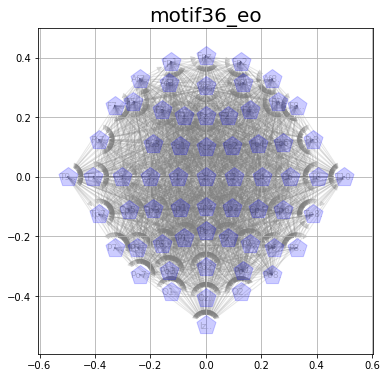

In [48]:
plt.figure(figsize=(6,6))
nx.draw_networkx(g_motifs36_eo, pos=position36_eo, arrows=True,
                 edge_color="gray", node_size=400, node_shape="p",node_color="blue", font_size=9,font_color="Black",
                linewidths=1, width=1, cmap=plt.cm.autumn_r, alpha=0.2)
#nx.draw_networkx_edge_labels(g_motifs36_eo, position36_eo, edge_labels=edge_labels36_eo)
plt.grid()
plt.title("motif36_eo", fontsize=20)
plt.savefig( motif3_eo_dir + "/motif36_eo.png", format="png" )
plt.show()

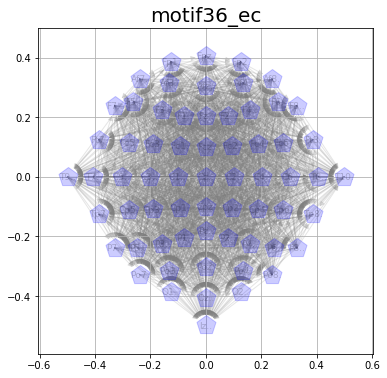

In [49]:
plt.figure(figsize=(6,6))
nx.draw_networkx(g_motifs36_ec, pos=position36_ec, arrows=True,
                 edge_color="gray", node_size=400, node_shape="p",node_color="blue", font_size=9,font_color="Black",
                linewidths=1, width=1, cmap=plt.cm.autumn_r, alpha=0.2)
#nx.draw_networkx_edge_labels(g_motifs36_eo, position36_eo, edge_labels=edge_labels36_eo)
plt.grid()
plt.title("motif36_ec", fontsize=20)
plt.savefig( motif3_ec_dir + "/motif36_ec.png", format="png" )
plt.show()

###  Perform the same analysis described in task 3.1 considering 4-node motifs

In [50]:
! mfinder motif_input_eo.txt -r 10 -s 4 -omat

'mfinder' is not recognized as an internal or external command,
operable program or batch file.


In [51]:
! mfinder motif_input_ec.txt -r 10 -s 4 -omat

'mfinder' is not recognized as an internal or external command,
operable program or batch file.


In [52]:
motifs4_eo = np.loadtxt(motif4_eo_dir + "/motif_input_eo_MAT.txt")
motifs4_ec = np.loadtxt(motif4_ec_dir + "/motif_input_ec_MAT.txt")

In [53]:
indices4_eo=motifs_analysis(motifs4_eo)
indices4_ec=motifs_analysis(motifs4_ec)

In [54]:
motif4_eo_df = pd.DataFrame(indices4_eo, index=indices4_eo["ix"], columns=["frequency", "statistical significance"])
motif4_ec_df = pd.DataFrame(indices4_ec, index=indices4_ec["ix"], columns=["frequency", "statistical significance"])

In [55]:
motif4_eo_df.to_csv(motif4_eo_dir + "/motif4_eo.csv")
motif4_ec_df.to_csv(motif4_ec_dir + "/motif4_ec.csv")

# Community detection <a name="7"></a>

### Determine number and composition (i.e. list of nodes) of the communities obtained applying one of the algorithms introduced​ during the course.

In [56]:
# Setting folder paths for community detection

cd_root_dir = os.path.join(my_path, "data/community_detection") 
infomap_dir = os.path.join(my_path, "data/community_detection/infomap") 
infomap_eo_dir = os.path.join(my_path, "data/community_detection/infomap/eo")
infomap_ec_dir = os.path.join(my_path, "data/community_detection/infomap/ec")

louvain_dir = os.path.join(my_path, "data/community_detection/louvain") 
louvain_eo_dir = os.path.join(my_path, "data/community_detection/louvain/eo")
louvain_ec_dir = os.path.join(my_path, "data/community_detection/louvain/ec")

In [57]:
cur_dtf_cd = best_alpha_obj['dtf'][2]
g_cd_eo = cur_dtf_cd['open_graph_matrix']
g_cd_ec = cur_dtf_cd['close_graph_matrix']

In [58]:
G_community_eo = nx.DiGraph(g_cd_eo)
G_community_ec = nx.DiGraph(g_cd_ec)

In [59]:
import igraph 

In [60]:
g_community_eo = build_community_graph(g_cd_eo)
g_community_ec = build_community_graph(g_cd_ec)

### louvain

In [61]:
import louvain

In [62]:
louvain_clusters_eo=louvain.find_partition(g_community_eo, louvain.ModularityVertexPartition)
louvain_clusters_ec=louvain.find_partition(g_community_ec, louvain.ModularityVertexPartition)

In [63]:
len(louvain_clusters_eo)

5

In [64]:
len(louvain_clusters_ec)

4

In [65]:
louvain_eo = process_louvain(louvain_clusters_eo)
louvain_ec = process_louvain(louvain_clusters_ec)

In [66]:
louvain_eo.to_csv( louvain_dir + "/louvain_eo.csv" )
louvain_ec.to_csv( louvain_dir + "/louvain_ec.csv" )

### Make a graphical representation of the community structure in both rest conditions

In [67]:
colors_eo = generate_cluster_colors(G_community_eo, louvain_clusters_eo)
colors_ec = generate_cluster_colors(G_community_ec, louvain_clusters_ec)

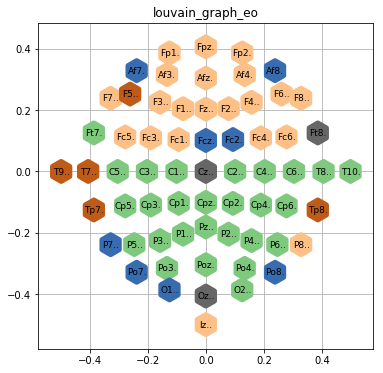

In [68]:
plt.figure(figsize=(6,6))
nx.draw_networkx(G_community_eo, pos=position, arrows=True, labels={k:v for k,v in enumerate(signal_labels)},
                 edge_color="green", node_color=colors_eo, node_size=400, node_shape="h", font_size=9,
                linewidths =5, width=2, edgelist=[ ], cmap=plt.cm.Accent)
plt.grid()
plt.title("louvain_graph_eo")
plt.savefig( louvain_eo_dir + "/louvain_graph_eo.png", format="png" )
plt.show()

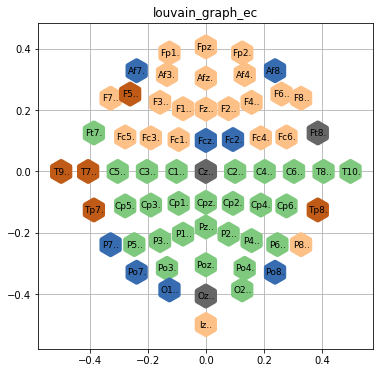

In [69]:
plt.figure(figsize=(6,6))
nx.draw_networkx(G_community_ec, pos=position, arrows=True, labels={k:v for k,v in enumerate(signal_labels)},
                edge_color="green", node_color=colors_eo, node_size=400, node_shape="h", font_size=9,
                linewidths =5, width=2, edgelist=[ ], cmap=plt.cm.Accent)
plt.grid()
plt.title("louvain_graph_ec")
plt.savefig( louvain_ec_dir + "/louvain_graph_ec.png", format="png" )
plt.show()

### Compare the community structure obtained by means of two different methods (modularity-based vs information theory-based approaches).

### Infomap

In [70]:
generate_infomap_file(G_community_eo, infomap_eo_dir + "/infomap_eo.txt")
generate_infomap_file(G_community_ec, infomap_ec_dir + "/infomap_ec.txt")

In [71]:
#! Infomap -d -z -2 community_infomap.txt ./infomap/

In [72]:
infomap_eo=pd.read_csv( infomap_eo_dir + "/infomap_eo.tree", sep=" ", header=None, index_col=False)
infomap_ec=pd.read_csv(infomap_ec_dir + "/infomap_ec.tree", sep=" ", header=None, index_col=False)

In [73]:
clusters_infomap_eo = process_infomap(infomap_eo)
clusters_infomap_ec = process_infomap(infomap_ec)

In [74]:
clusters_infomap_eo_df = {"cluster": [i[0] for i in clusters_infomap_eo], "ix": [i[1] for i in clusters_infomap_eo]}
clusters_infomap_ec_df = {"cluster": [i[0] for i in clusters_infomap_ec], "ix": [i[1] for i in clusters_infomap_ec]}

In [75]:
clusters_infomap_eo_df=pd.DataFrame(clusters_infomap_eo_df)
clusters_infomap_ec_df=pd.DataFrame(clusters_infomap_ec_df)

In [76]:
clusters_infomap_eo_df.to_csv( infomap_eo_dir + "/infomap_eo.csv", index=None)
clusters_infomap_ec_df.to_csv( infomap_ec_dir + "/infomap_ec.csv", index=None)

In [77]:
colors_infomap_eo = colors_infomap(clusters_infomap_eo)
colors_infomap_ec = colors_infomap(clusters_infomap_ec)

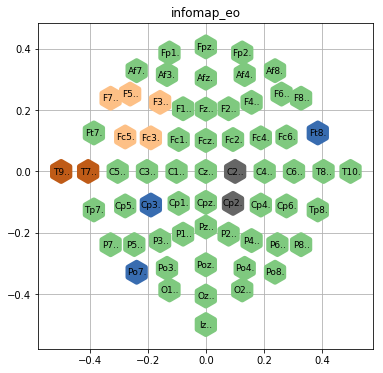

In [78]:
plt.figure(figsize=(6,6))
nx.draw_networkx(G_community_eo, pos=position, arrows=True, labels={k:v for k,v in enumerate(signal_labels)},
                 edge_color="green", node_color=colors_infomap_eo, node_size=400, node_shape="h", font_size=9,
                linewidths =5, width=2, edgelist=[ ], cmap=plt.cm.Accent)
plt.grid()
plt.title("infomap_eo")
plt.savefig( infomap_eo_dir + "/infomap_eo.png", format="png")
plt.show()

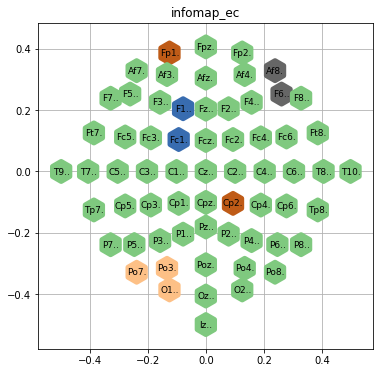

In [79]:
plt.figure(figsize=(6,6))
nx.draw_networkx(G_community_ec, pos=position, arrows=True, labels={k:v for k,v in enumerate(signal_labels)},
                 edge_color="green", node_color=colors_infomap_ec, node_size=400, node_shape="h", font_size=9,
                linewidths =5, width=2, edgelist=[ ], cmap=plt.cm.Accent)
plt.grid()
plt.title("infomap_ec")
plt.savefig( infomap_ec_dir + "/infomap_ec.png", format="png")
plt.show()